## Worked Problem Assignment 1 - Simple Pendulum

### Cesarine Graham, PHY 415

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## 4. Solve the equations of motion numerically to produce trajectories for the system. You should include at least two different initial conditions.

### <span style="color:magenta"> Below I am solving the equations numerically with two changes in my initial conditions: a smaller initial angle, and a larger initial angle.

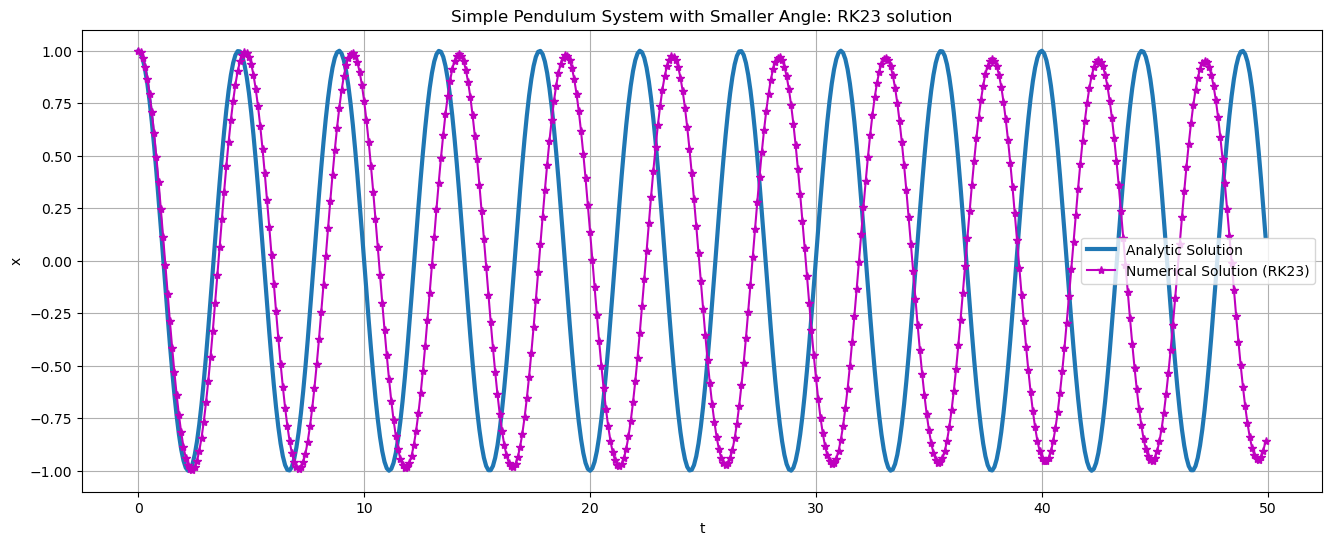

In [10]:
# 1. Derivatives Function
def diffyqs(t, curr_vals, omega2):
    x, v = curr_vals 
    vdot = -omega2 * np.sin(x)
    return v, vdot

# 2. Time Setup
tmax = 50
dt = 0.1
tspan = (0, tmax)
t = np.arange(0, tmax, dt)

# 3. Parameters and Initial Conditions
omega2 = 2
initial_condition = [1, 0] 

# 4. Call Integrator (note we can swamp them out, RK45 is the default)
RK23solved = solve_ivp(diffyqs, tspan, initial_condition, t_eval = t, args = (omega2,), method="RK23")

# 5. Visualization and Comparison to analytical solution
def analytic_sol(t, omega0, initial_condition):
    x0, v0 = initial_condition
    return (v0/omega0)*np.sin(omega0*t) + x0 * np.cos(omega0*t)

plt.figure(figsize=(16, 6))
plt.plot(t, analytic_sol(t, omega2**0.5,initial_condition), label = "Analytic Solution", linewidth = 3)
plt.plot(t, RK23solved.y[0], label = "Numerical Solution (RK23)", marker='*', color = 'm')
plt.title("Simple Pendulum System with Smaller Angle: RK23 solution")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.grid()

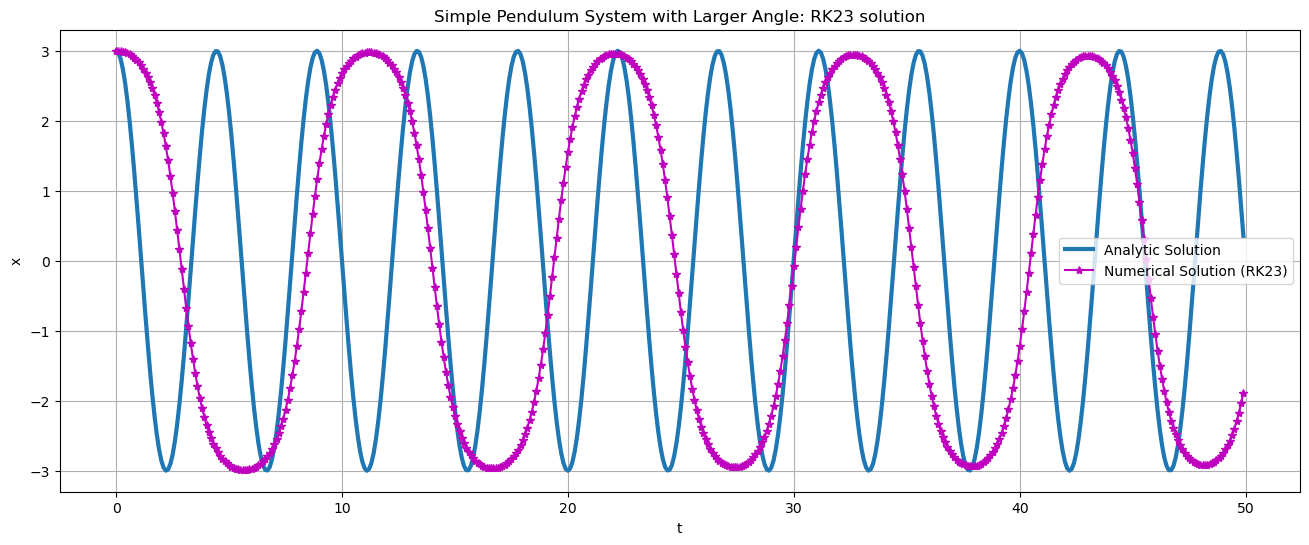

In [3]:
# 1. Derivatives Function
def diffyqs(t, curr_vals, omega2):
    x, v = curr_vals 
    vdot = -omega2 * np.sin(x)
    return v, vdot

# 2. Time Setup
tmax = 50
dt = 0.1
tspan = (0, tmax)
t = np.arange(0, tmax, dt)

# 3. Parameters and Initial Conditions
omega2 = 2
initial_condition =[3, 0] 

# 4. Call Integrator (note we can swamp them out, RK45 is the default)
RK23solved = solve_ivp(diffyqs, tspan, initial_condition, t_eval = t, args = (omega2,), method="RK23")

# 5. Visualization and Comparison to analytical solution
def analytic_sol(t, omega0, initial_condition):
    x0, v0 = initial_condition
    return (v0/omega0)*np.sin(omega0*t) + x0 * np.cos(omega0*t)

plt.figure(figsize=(16, 6))
plt.plot(t, analytic_sol(t, omega2**0.5,initial_condition), label = "Analytic Solution", linewidth = 3)
plt.plot(t, RK23solved.y[0], label = "Numerical Solution (RK23)", marker='*', color = 'm')
plt.title("Simple Pendulum System with Larger Angle: RK23 solution")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.grid()

## 5. Use the approximate techniques we have discussed to find frequencies of oscillation and stable equilibria. Compare these to the numerical results.

### <span style="color:magenta"> In the following code, I am solving the equations numerically with a small angle approximation $\sin(\theta ) \approx \theta$ and the RK23 method.

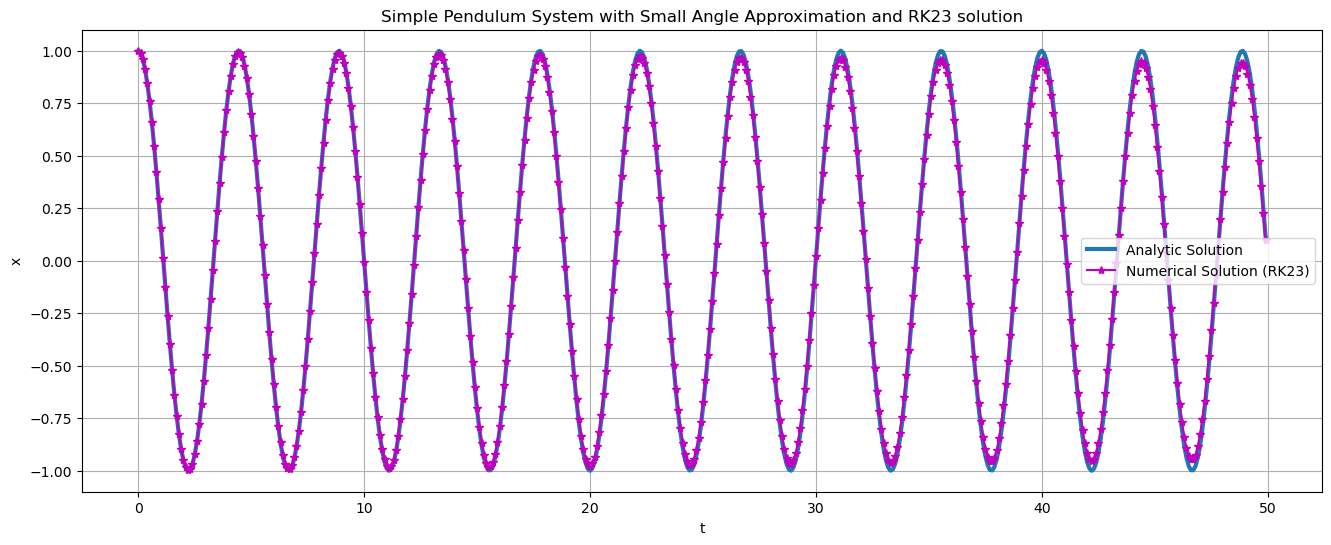

In [12]:
# 1. Derivatives Function
def diffyqs(t, curr_vals, omega2):
    x, v = curr_vals 
    vdot = -omega2 * x
    return v, vdot

# 2. Time Setup
tmax = 50
dt = 0.1
tspan = (0, tmax)
t = np.arange(0, tmax, dt)

# 3. Parameters and Initial Conditions
omega2 = 2
initial_condition = [1, 0] 

# 4. Call Integrator 
RK23solved = solve_ivp(diffyqs, tspan, initial_condition, t_eval = t, args = (omega2,), method="RK23")

# 5. Visualization and Comparison to analytical solution
def analytic_sol(t, omega0, initial_condition):
    x0, v0 = initial_condition
    return (v0/omega0)*np.sin(omega0*t) + x0 * np.cos(omega0*t)

plt.figure(figsize=(16, 6))
plt.plot(t, analytic_sol(t, omega2**0.5,initial_condition), label = "Analytic Solution", linewidth = 3)
plt.plot(t, RK23solved.y[0], label = "Numerical Solution (RK23)", marker='*', color = 'm')
plt.title("Simple Pendulum System with Small Angle Approximation and RK23 solution")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.grid()

### <span style="color:magenta"> The approximation made the analytic solution and numerical solution match very nicely. The previous solutions made in Question 4 without the approximations do match somewhat for a few periods, but not in the long term like the solution to Question 5 can.

### <span style="color:magenta"> The stable equilibria occurs when $\omega = 0$ and when $\theta = n\pi$, $n \in \mathbb{Z}$. Taking a closer look at the parameters for $\theta$, it could be argued that the equilibria occurs when $\omega = 0$ and $\theta = 0$.

## E.C. Develop a phase space diagram for your system to show what families of solutions exist.

In [5]:
def SHOPhasePortrait(x, vx, omega):
    xdot, vxdot = [vx, -1*omega**2*x]
    
    return xdot, vxdot

def ComputeSHOPhase(X, VX, omega):
    ## Prep the arrays with zeros at the right size
    xdot, vxdot = np.zeros(X.shape), np.zeros(VX.shape)

    ## Set the limits of the loop based on how 
    ## many points in the arrays we have
    Xlim, Ylim = X.shape
    
    ## Calculate the changes at each location and add them to the arrays
    for i in range(Xlim):
        for j in range(Ylim):
            xloc = X[i, j]
            yloc = VX[i, j]
            xdot[i,j], vxdot[i,j] = SHOPhasePortrait(xloc, yloc, omega)
            
    return xdot, vxdot

def SHOTrajectory(x0, vx0, omega, N=100):
    ## Only work with one period
    T = 2*np.pi/omega
    t = np.arange(0,T,T/N)
    
    phi = np.arctan2(-1*vx0, omega*x0) ## arctan(-vxo/(omega*x0)) taken correctly for the quadrant
    A = x0/np.cos(phi)
    x_traj = A*np.cos(omega*t+phi)
    v_traj = -omega*A*np.sin(omega*t+phi)
    
    return x_traj, v_traj

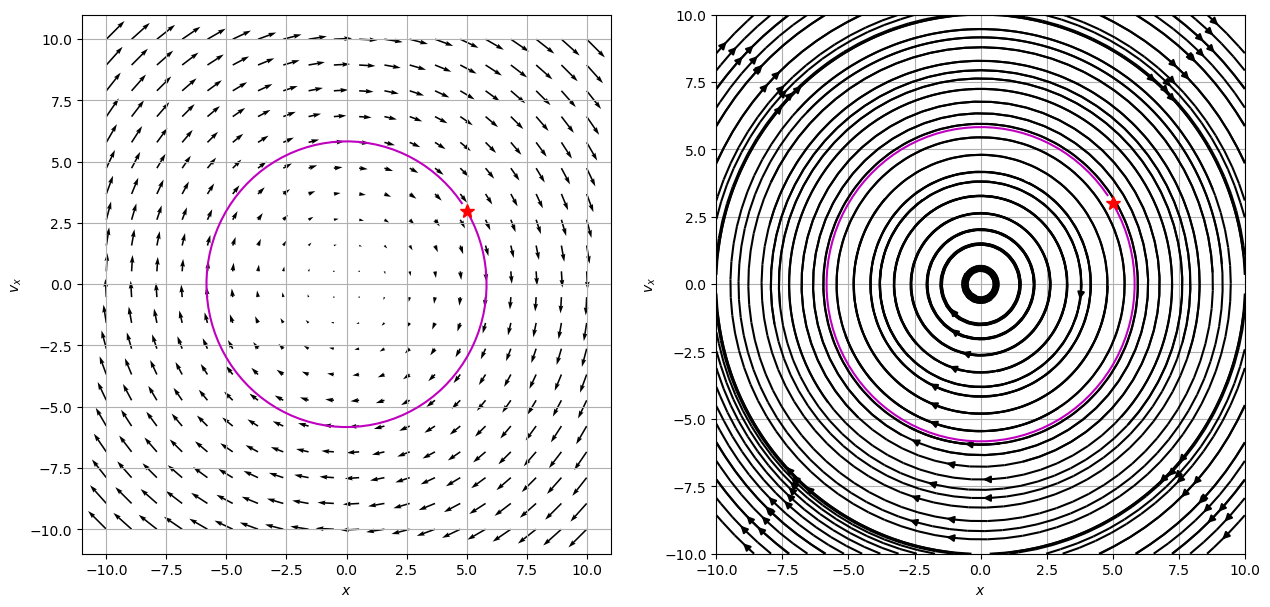

In [6]:
## Setting parameters and the phase space variables
omega = 1
x = np.linspace(-10.0, 10.0, 20)
vx = np.linspace(-10.0, 10.0, 20)

## Get back pairs of coordinates for every point in the space
X, VX = np.meshgrid(x, vx)

## Run our calculations
xdot, vxdot = ComputeSHOPhase(X, VX, omega)

x0 = 5
vx0 = 3
x_traj, v_traj = SHOTrajectory(x0, vx0, omega)

## Plot. plot. plot.
ax = plt.figure(figsize=(15,7))
plt.subplot(1,2,1)

## Plot with Quiver
Q = plt.quiver(X, VX, xdot, vxdot, color='k')

## Plot trajectory and the starting location
plt.plot(x_traj,v_traj, color='m')
plt.plot(x0, vx0, 'r*', markersize=10)

plt.xlabel('$x$')
plt.ylabel('$v_x$')
plt.grid()

plt.subplot(1,2,2)
Q = plt.streamplot(X, VX, xdot, vxdot, color='k', broken_streamlines = False)
plt.plot(x_traj,v_traj, color='m')
plt.plot(x0, vx0, 'r*', markersize=10)

plt.xlabel('$x$')
plt.ylabel('$v_x$')
plt.grid()